In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("ecommerce_pricing_dataset.csv")

In [15]:
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset: (50000, 11)

Data Types:
 order_id              int64
product_id            int64
category             object
price               float64
discount_percent    float64
quantity              int64
date                 object
revenue             float64
realized_price      float64
cogs_per_unit       float64
gross_margin        float64
dtype: object

Missing values:
 order_id            0
product_id          0
category            0
price               0
discount_percent    0
quantity            0
date                0
revenue             0
realized_price      0
cogs_per_unit       0
gross_margin        0
dtype: int64


In [19]:
df.head()

,order_id,product_id,category,price,discount_percent,quantity,date,revenue,realized_price,cogs_per_unit,gross_margin
0,1,100889,Grocery & FMCG,405.02,14.46,4,12-04-2024,1385.85,346.46,356.42,-39.81
1,2,100954,Grocery & FMCG,103.04,35.72,3,14-12-2024,198.70,66.23,90.68,-73.34
2,3,100617,Footwear,377.66,60.00,1,27-09-2024,151.06,151.06,256.81,-105.74
3,4,100232,Beauty & Personal Care,263.66,32.13,2,16-04-2024,357.87,178.93,184.56,-11.25
4,5,100353,Home & Kitchen,445.41,39.76,1,12-03-2024,268.31,268.31,320.69,-52.38


In [21]:
df.describe()

,order_id,product_id,price,discount_percent,quantity,revenue,realized_price,cogs_per_unit,gross_margin
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,100497.641360,370.889538,31.753257,2.12970,485.557489,252.956803,273.322265,-57.375839
std,14433.901067,288.688908,225.808121,15.489329,1.48888,422.291294,168.173450,170.819108,183.815669
min,1.000000,100000.000000,50.000000,0.140000,1.00000,23.800000,20.000000,44.000000,-2688.000000
25%,12500.750000,100247.000000,207.640000,19.430000,1.00000,212.867500,135.670000,153.205000,-104.182500
50%,25000.500000,100497.000000,311.710000,30.820000,2.00000,358.550000,207.965000,226.790000,-20.730000
75%,37500.250000,100748.000000,472.827500,43.592500,3.00000,612.275000,323.565000,346.280000,30.362500
max,50000.000000,100999.000000,1500.000000,60.000000,14.00000,7159.020000,1458.880000,1230.000000,1153.430000


In [27]:
print("\nUnique categories:", df['category'].nunique())
print("Categories:", df['category'].unique()[:10]) 


Unique categories: 8
Categories: ['Grocery & FMCG' 'Footwear' 'Beauty & Personal Care' 'Home & Kitchen'
 'Kids & Baby' 'Electronics Accessories' 'Jewelry' 'Fashion']


In [29]:
print("\nSample revenue values:", df['revenue'].head())


Sample revenue values: 0    1385.85
1     198.70
2     151.06
3     357.87
4     268.31
Name: revenue, dtype: float64


In [31]:
print("\nCorrelation Matrix:\n", df.corr(numeric_only=True))


Correlation Matrix:
                   order_id  product_id     price  discount_percent  quantity  \
order_id          1.000000   -0.002873  0.002972          0.004390  0.004970   
product_id       -0.002873    1.000000 -0.056979          0.006244 -0.147481   
price             0.002972   -0.056979  1.000000          0.004667 -0.128962   
discount_percent  0.004390    0.006244  0.004667          1.000000  0.298610   
quantity          0.004970   -0.147481 -0.128962          0.298610  1.000000   
revenue           0.007543   -0.184228  0.571849         -0.043577  0.555770   
realized_price    0.001321   -0.054479  0.916562         -0.337532 -0.212331   
cogs_per_unit     0.001199    0.015625  0.986400          0.004808 -0.153981   
gross_margin     -0.004334   -0.105536 -0.142909         -0.694523 -0.403483   

                   revenue  realized_price  cogs_per_unit  gross_margin  
order_id          0.007543        0.001321       0.001199     -0.004334  
product_id       -0.184228   

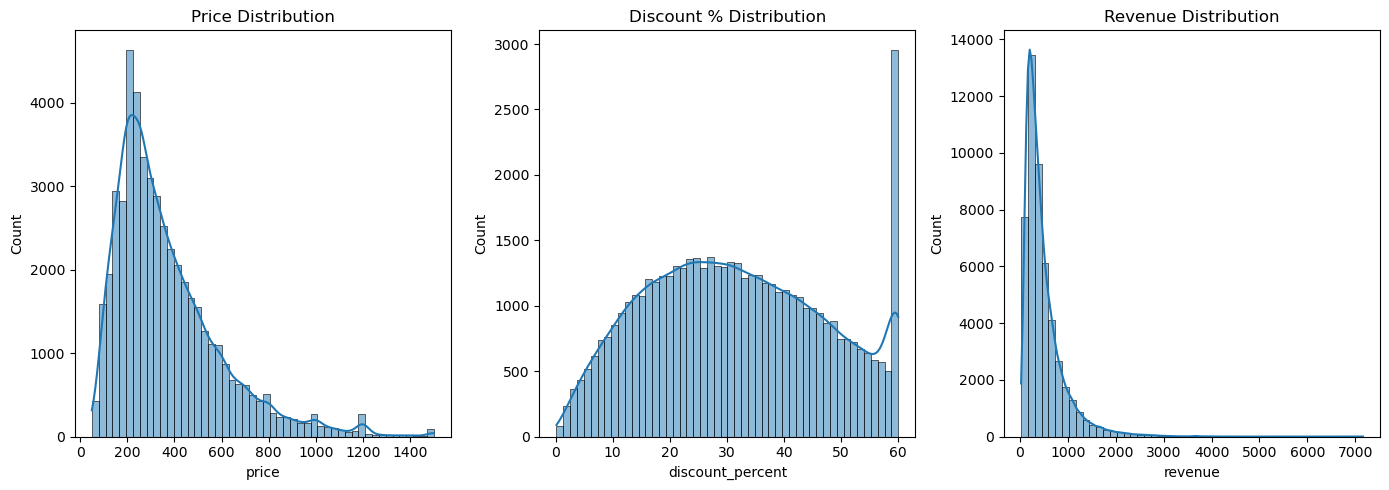

In [33]:
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")

plt.subplot(1,3,2)
sns.histplot(df['discount_percent'], bins=50, kde=True)
plt.title("Discount % Distribution")

plt.subplot(1,3,3)
sns.histplot(df['revenue'], bins=50, kde=True)
plt.title("Revenue Distribution")

plt.tight_layout()
plt.show()

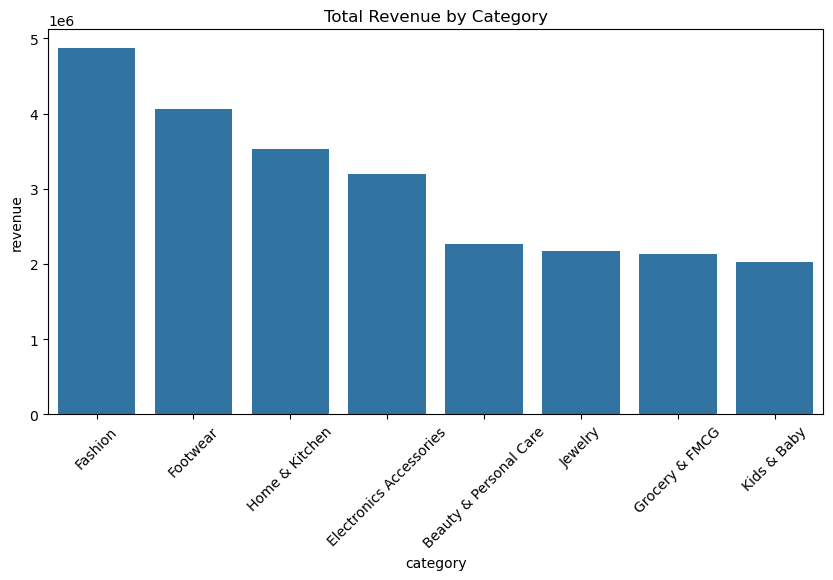

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(data=df.groupby('category')['revenue'].sum().reset_index().sort_values('revenue', ascending=False),
            x='category', y='revenue')
plt.xticks(rotation=45)
plt.title("Total Revenue by Category")
plt.show()

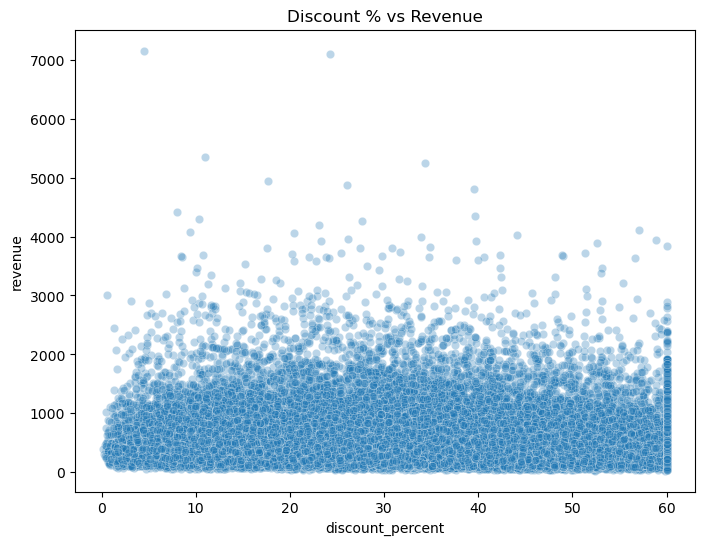

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='discount_percent', y='revenue', alpha=0.3)
plt.title("Discount % vs Revenue")
plt.show()

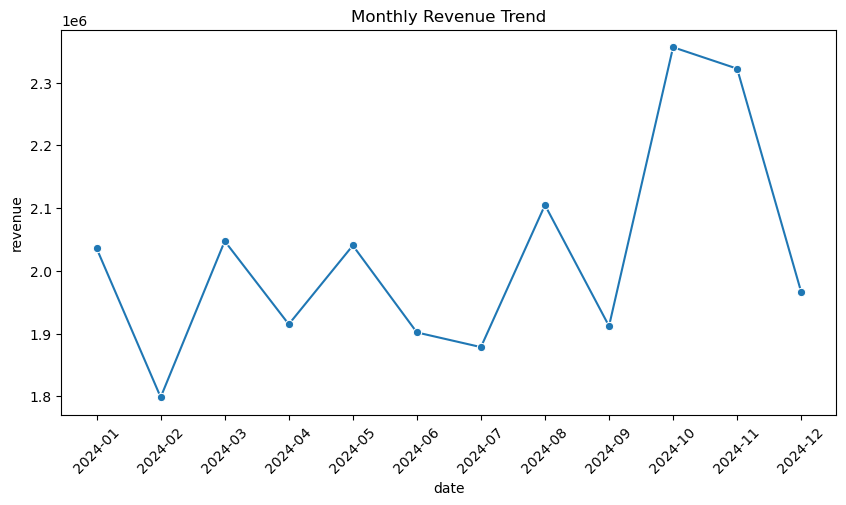

In [45]:
# Convert date column properly (DD-MM-YYYY format)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Now group by month for revenue trend
monthly = df.groupby(df['date'].dt.to_period("M"))['revenue'].sum().reset_index()
monthly['date'] = monthly['date'].astype(str)  # Convert period to string for plotting

# Plot revenue trend
plt.figure(figsize=(10,5))
sns.lineplot(x='date', y='revenue', data=monthly, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.show()


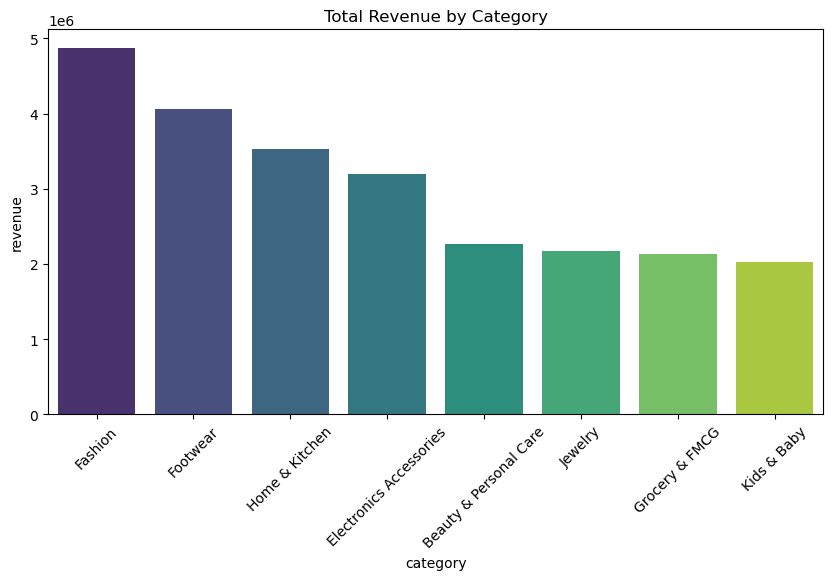

In [65]:
# 1. Revenue by Category
category_revenue = df.groupby("category")['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='category', y='revenue', data=category_revenue, hue='category', palette="viridis", legend=False)
                       
plt.xticks(rotation=45)
plt.title("Total Revenue by Category")
plt.show()

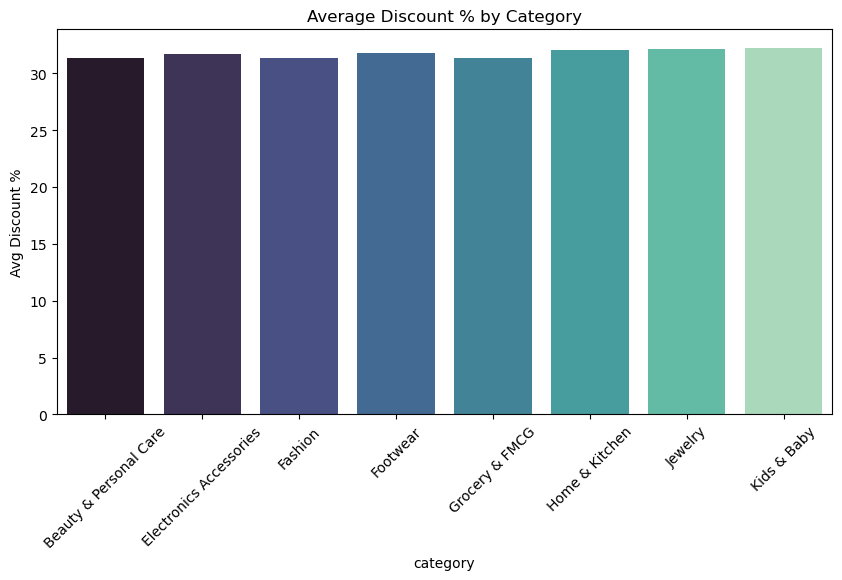

In [71]:
# Average discount percent per category
avg_discount_cat = df.groupby("category")['discount_percent'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="category", y="discount_percent",hue="category", data=avg_discount_cat, palette="mako",legend=False)
plt.xticks(rotation=45)
plt.title("Average Discount % by Category")
plt.ylabel("Avg Discount %")
plt.show()


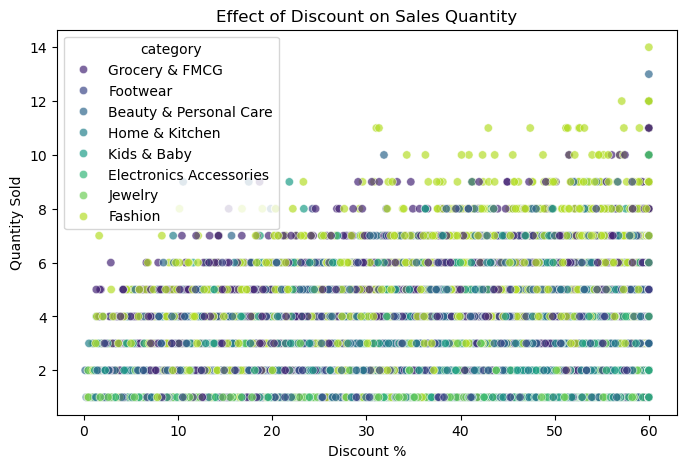

In [73]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="discount_percent", 
    y="quantity", 
    hue="category",     
    data=df, 
    palette="viridis", 
    alpha=0.7
)
plt.title("Effect of Discount on Sales Quantity")
plt.xlabel("Discount %")
plt.ylabel("Quantity Sold")
plt.show()


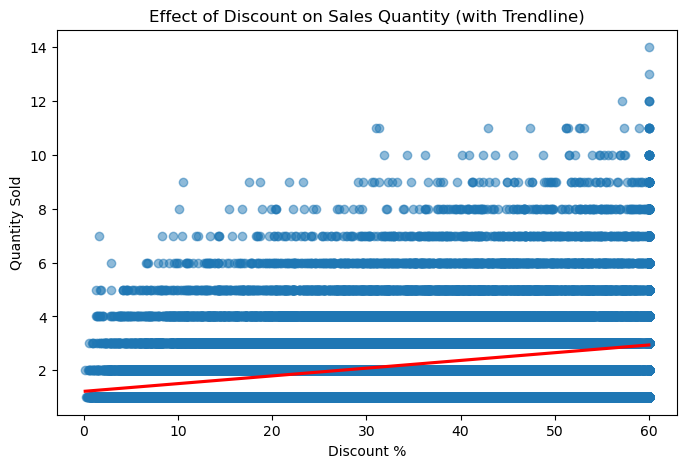

In [75]:
plt.figure(figsize=(8,5))
sns.regplot(
    x="discount_percent", 
    y="quantity", 
    data=df, 
    scatter_kws={"alpha":0.5}, 
    line_kws={"color":"red"}
)
plt.title("Effect of Discount on Sales Quantity (with Trendline)")
plt.xlabel("Discount %")
plt.ylabel("Quantity Sold")
plt.show()


Correlation between Discount % and Revenue: -0.04


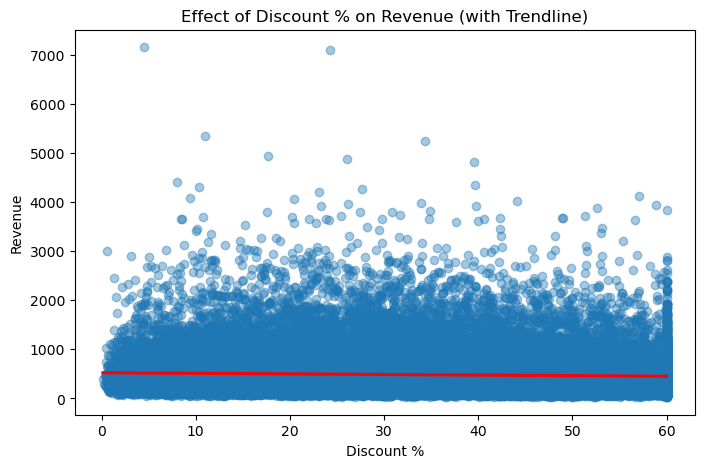

In [83]:
# Correlation coefficient
corr = df['discount_percent'].corr(df['revenue'])
print(f"Correlation between Discount % and Revenue: {corr:.2f}")

# Visualization
plt.figure(figsize=(8,5))
sns.regplot(
    x="discount_percent", 
    y="revenue", 
    data=df, 
    scatter_kws={"alpha":0.4}, 
    line_kws={"color":"red"}
)
plt.title("Effect of Discount % on Revenue (with Trendline)")
plt.xlabel("Discount %")
plt.ylabel("Revenue")
plt.show()


In [91]:
import statsmodels.api as sm

# Independent variable (Discount %)
X = df['discount_percent']
X = sm.add_constant(X)  # Adds intercept term

# Dependent variable (Quantity sold)
y = df['quantity']

# Build OLS regression model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     4895.
Date:                Fri, 22 Aug 2025   Prob (F-statistic):               0.00
Time:                        11:39:21   Log-Likelihood:                -88513.
No. Observations:               50000   AIC:                         1.770e+05
Df Residuals:                   49998   BIC:                         1.770e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2183      0.014  

In [93]:
import statsmodels.api as sm

# Store results for each category
results = []

for cat in df['category'].unique():
    sub_df = df[df['category'] == cat]

    X = sm.add_constant(sub_df['discount_percent'])
    y = sub_df['quantity']

    model = sm.OLS(y, X).fit()
    
    results.append({
        'Category': cat,
        'Coefficient': model.params['discount_percent'],
        'P-Value': model.pvalues['discount_percent'],
        'R-squared': model.rsquared
    })

# Convert to DataFrame for better view
cat_regression = pd.DataFrame(results)
cat_regression.sort_values(by="Coefficient", ascending=False, inplace=True)

print(cat_regression)


                  Category  Coefficient        P-Value  R-squared
7                  Fashion     0.060935   0.000000e+00   0.233149
4              Kids & Baby     0.036409  1.352923e-188   0.153033
2   Beauty & Personal Care     0.036344  1.190290e-213   0.145934
0           Grocery & FMCG     0.033499  7.694925e-143   0.099118
1                 Footwear     0.030094  6.857725e-210   0.136674
3           Home & Kitchen     0.022995  2.362709e-133   0.091957
5  Electronics Accessories     0.009273   6.334394e-42   0.031115
6                  Jewelry     0.004057   1.660248e-21   0.013216
